## Using our network on the second dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import torch
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from libs.my_conv_net import *
from libs.big_images import *

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
path="big_images/trafic_data"
test_path=os.path.join(path,"valid/images")

test_images=[]



for test in sorted(os.listdir(test_path)):
    test_images.append(plt.imread(os.path.join(test_path,test)))
    
test_df=pd.DataFrame({"image":test_images})

In [4]:
test_df

image
0    [[[160, 158, 159], [219, 217, 218], [210, 208,...
1    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2    [[[165, 156, 157], [212, 203, 204], [201, 195,...
3    [[[23, 12, 28], [22, 11, 27], [21, 10, 26], [2...
4    [[[102, 97, 120], [104, 99, 122], [94, 89, 111...
..                                                 ...
295  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
296  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
297  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
298  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
299  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[300 rows x 1 columns]

In [5]:
test_df["image"]=test_df["image"].apply(lambda x : x/255)

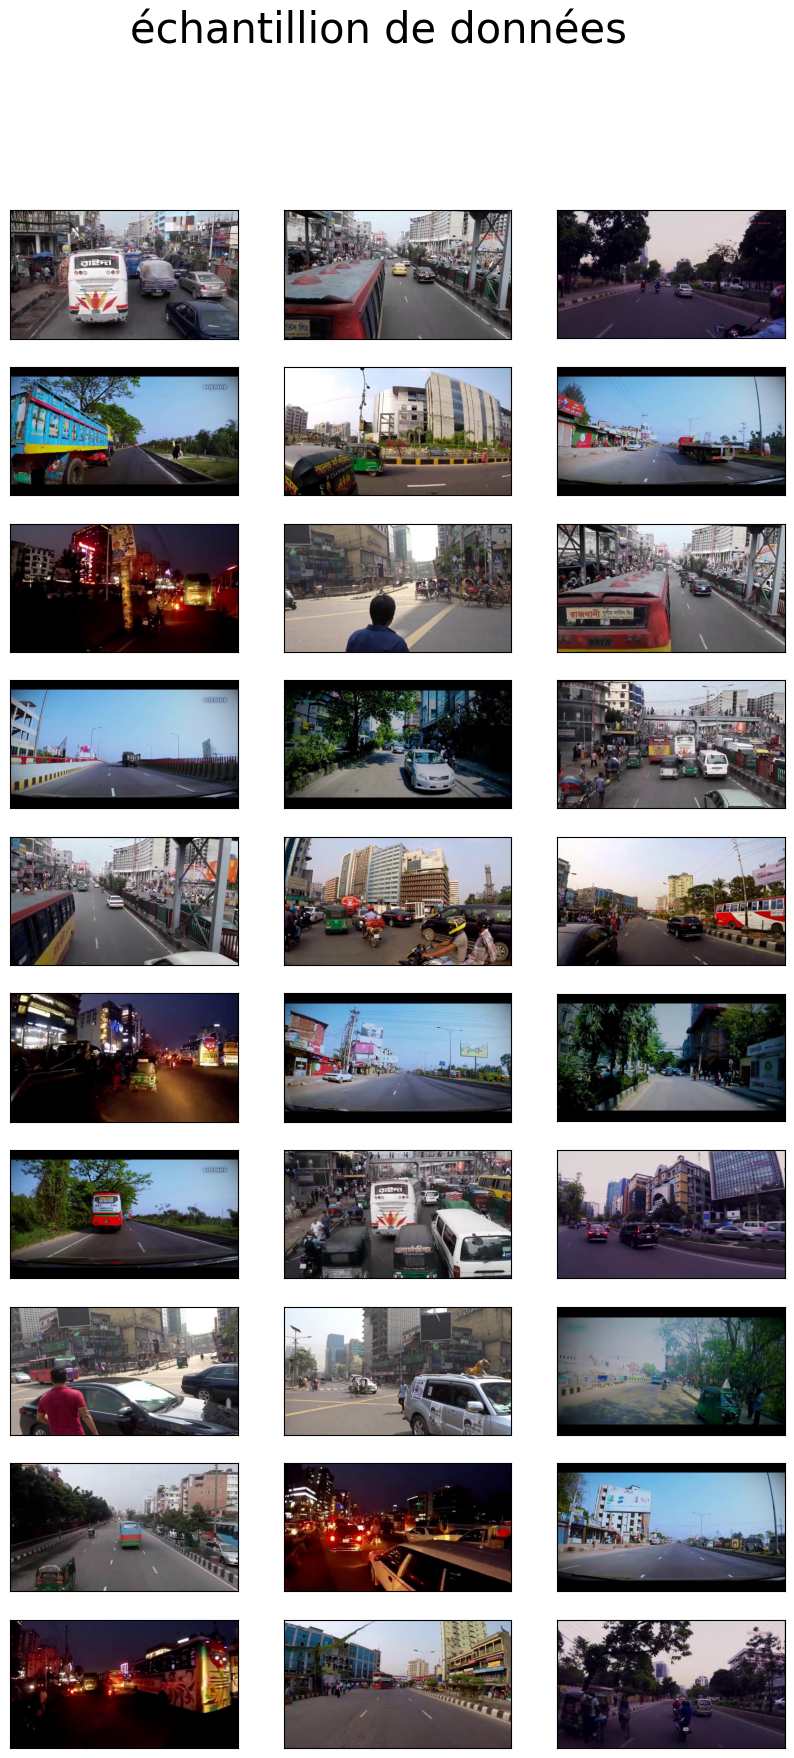

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
plot_images= random.choices(np.arange(len(test_df)),k=10*3)
for i,ax in enumerate(axes.flat):
    ax.imshow(test_df["image"][plot_images[i]])
    #ax.set_title(data_df["label"][plot_images[i]])
fig.suptitle("échantillion de données ",fontsize=30)
plt.savefig("big_images_sample.png")

In [7]:
test_dataset=BigImageDataset(test_df,device)

In [8]:
model = conv_net(3,2)
model.load_state_dict(torch.load("models/convnet3.pth",map_location=torch.device(device)))
model.eval()
model.to(device)

conv_net(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (r2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=12800, out_features=500, bias=True)
  (r3): ReLU()
  (l2): Linear(in_features=500, out_features=2, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

In [9]:
visualisation_imgs=random.choices(test_df["image"],k=10)

Text(0.5, 0.98, 'test images')

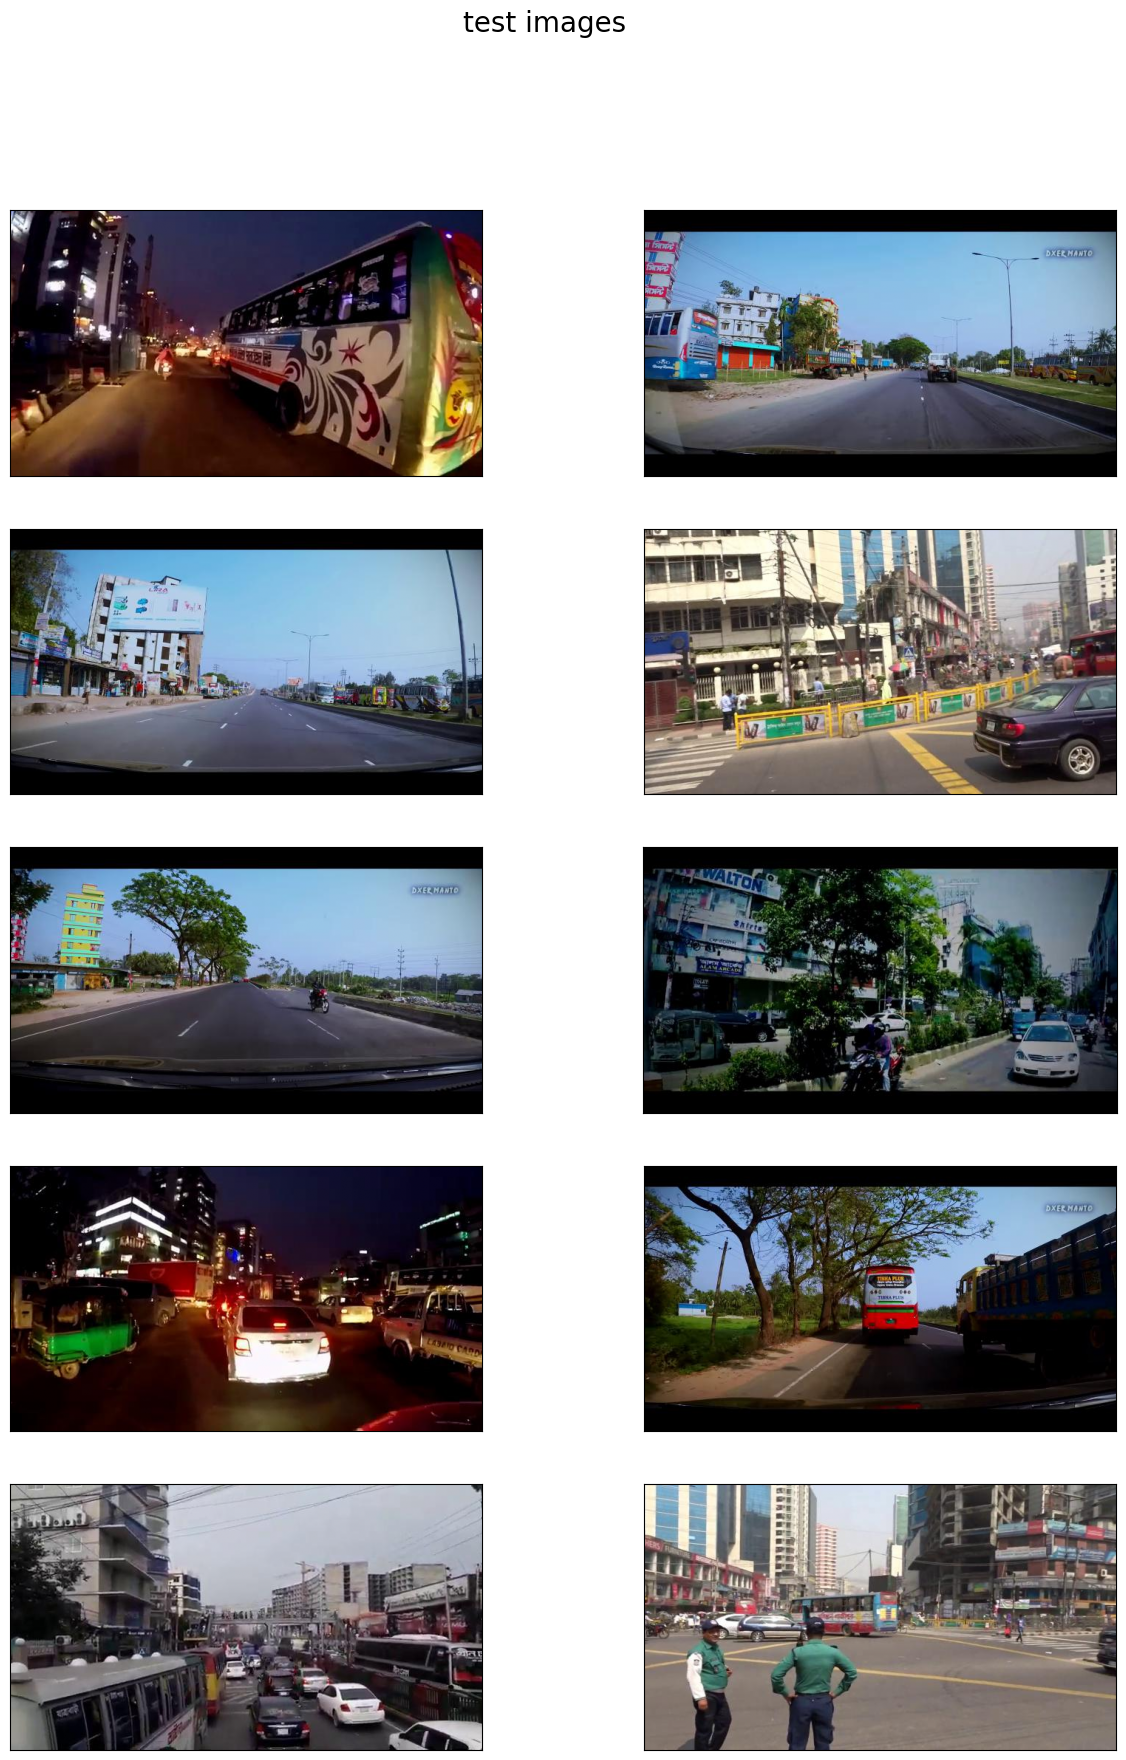

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
for i,ax in enumerate(axes.flat):
    ax.imshow(visualisation_imgs[i])
fig.suptitle("test images",fontsize=20)

In [58]:
res=[]
for img in visualisation_imgs :
        t=torch.tensor(img,dtype=torch.float32,device=device)
        f=check_in_images(dataset=t.unsqueeze(0),model=model,size=[64,64],step=8,device=device,edge_reg=True)
        res.append(combine_filter_image(img,def_image_quant(f[0],p=0.6)))

Text(0.5, 0.98, 'test images')

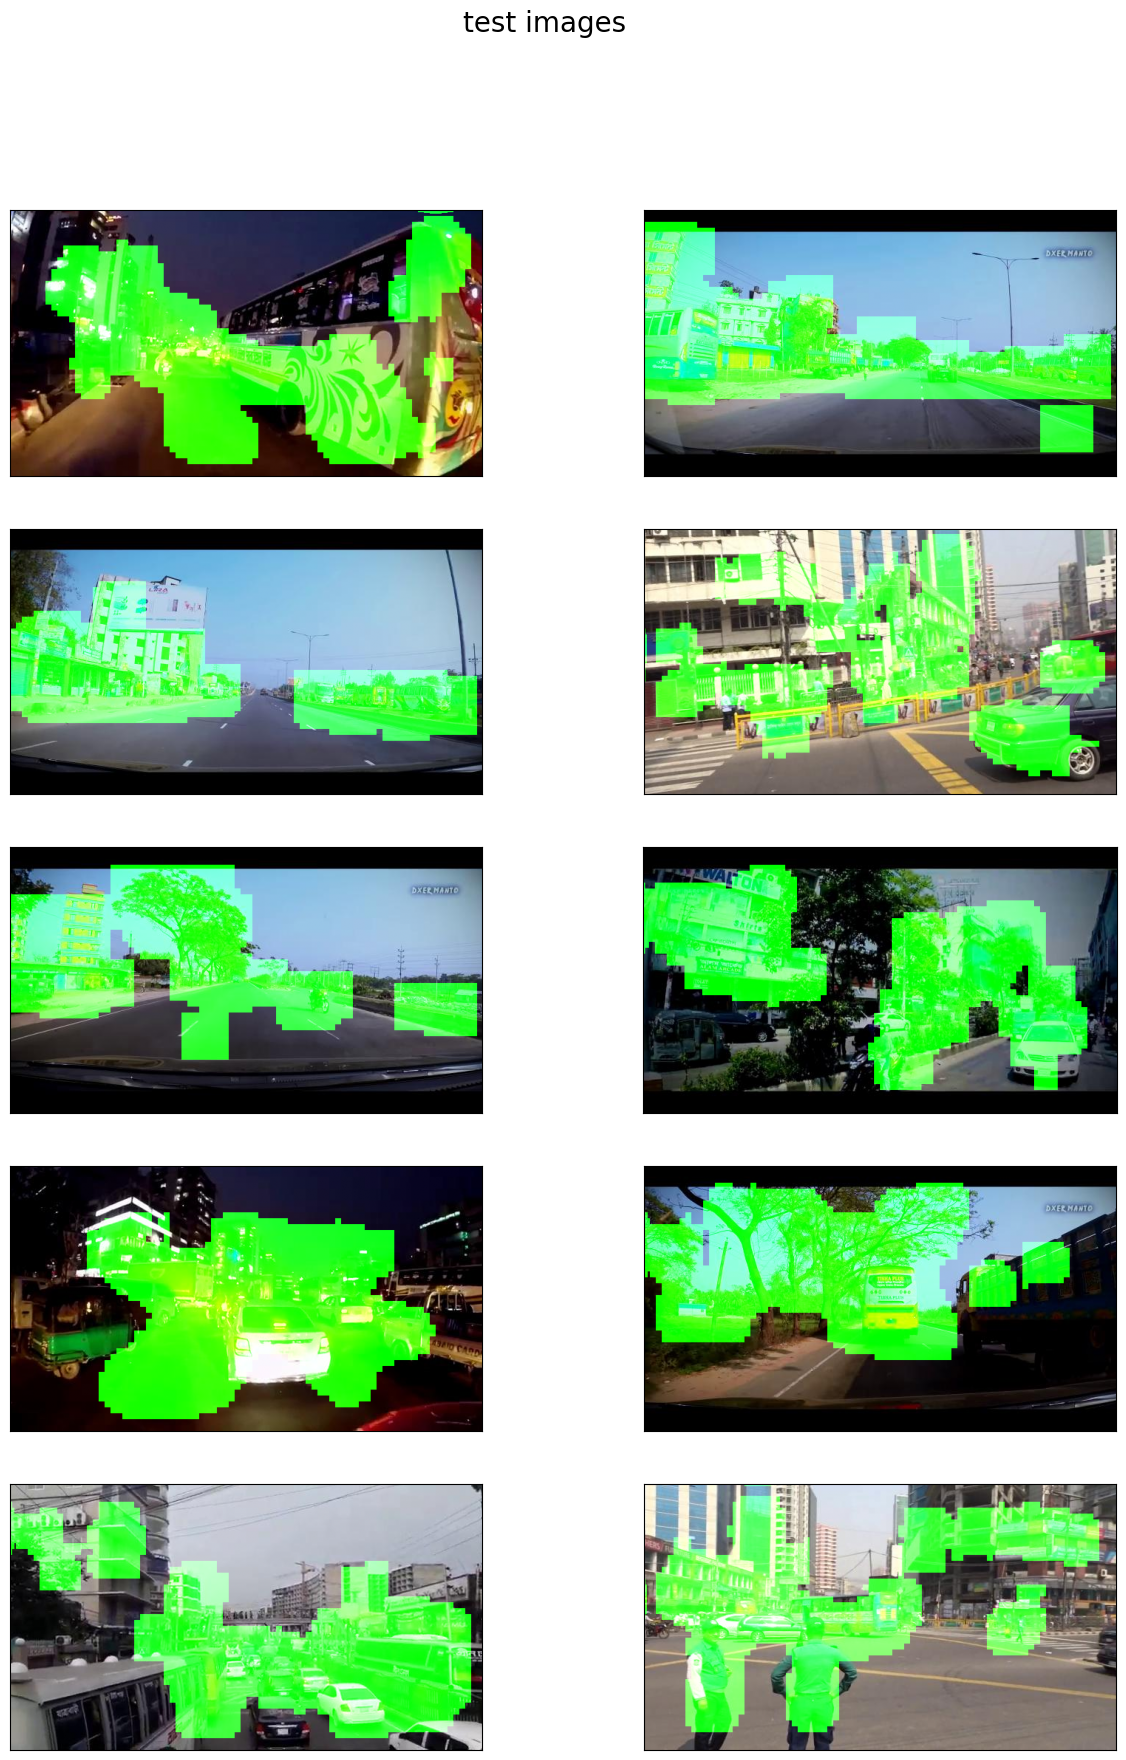

In [59]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
for i,ax in enumerate(axes.flat):
    ax.imshow(res[i])
fig.suptitle("test images",fontsize=20)

In [20]:
filters=[]
for i,img in enumerate(test_dataset):
    if(i%10==0):
        print(i,"/",len(test_df))
    filters.append(check_in_images(dataset=img.unsqueeze(0),model=model,size=[256,256],step=160,device=device,edge_reg=True))
    #res_quant.append(def_image_quant(filters[0],p=0.8))
    #res_val.append(def_image_value(filters[0],p=0.4))


0 / 300
10 / 300
20 / 300
30 / 300
40 / 300
50 / 300
60 / 300
70 / 300
80 / 300
90 / 300
100 / 300
110 / 300
120 / 300
130 / 300
140 / 300
150 / 300
160 / 300
170 / 300
180 / 300
190 / 300
200 / 300
210 / 300
220 / 300
230 / 300
240 / 300
250 / 300
260 / 300
270 / 300
280 / 300
290 / 300


In [21]:
filter_df=pd.DataFrame()
filter_df["mask"]=filters
filter_df.to_pickle("results/raw/pred_256_160_raw.pkl")

In [36]:
res_df_quant=pd.DataFrame()
res_df_quant["mask"]=res_quant
res_df_quant.to_pickle("results/pred_64_8_quant.pkl")

res_df_val=pd.DataFrame()
res_df_val["mask"]=res_val
res_df_quant.to_pickle("results/pred_64_8_quant.pkl")

In [252]:
f=np.ones((200,400))

In [255]:
r=edge_regulation(f,20)

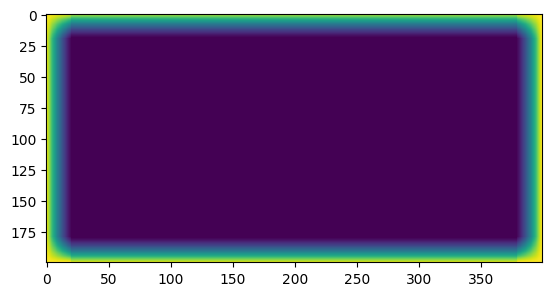

In [256]:
plt.imshow(r)

In [259]:
np.max(r)

0.99750312239746